In [4]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.impute import KNNImputer
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from pandas import Series, DataFrame, concat
from matplotlib import pyplot
from pandas.plotting import lag_plot, autocorrelation_plot
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from scipy.stats import boxcox
from datetime import datetime
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPRegressor
import copy
warnings.filterwarnings('ignore')

In [6]:
df1 = pd.read_csv("/content/drive/My Drive/CMPS276/df.csv")
df2 = pd.read_csv("/content/drive/My Drive/CMPS276/postImputer.csv")

In [7]:
L=[]

In [8]:
df1.set_index("Unnamed: 0",drop=True, inplace=True)
df2.set_index("Unnamed: 0",drop=True, inplace=True)

In [9]:
df2.tail()

,Cheque Buy,Cheque Sell,Bank,SyndicateB,SyndicateS,ParallelB,SyrianRate,Confirmed Cases,Recovered Cases,Recorded Deaths,weekday,buy_1,buy_5_mean,buy_10_mean,buy_15_mean,buy_5_10,buy_10_15,buy_5_15,buy_5_max,buy_10_max,buy_15_max,buy_5_min,buy_10_min,buy_15_min,buy_5_std,buy_10_std,buy_15_std,buy_5_emean,buy_10_emean,buy_15_emean,buy_return_1,buy_return_5,buy_return_10,buy_return_15,buy_moving_avg_5,buy_moving_avg_10,buy_moving_avg_15,buy_slope_5,buy_slope_10,buy_slope_15,buy_deriv2_5,buy_deriv2_10,buy_deriv2_15,ekspos,eksneu,eksneg,ekflebanese,ekflebanon,ekflollar,ekfdollar,ekflebaneselira,elspos,elsneu,elsneg,elflebanon,elfbeirut,elfiraq,elfiran,elfyara_lebanon,akspos,aksneu,aksneg,akfالدولار,akfفي,akfمصرف,akfمن,akfدولار,alspos,alsneu,alsneg,alfمن,alfلبنان,alfو,alfفي,alfلبنان_ينتفض,BM Buy
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-10-08,0.320000,0.330000,3900.0,3850.000000,3900.000000,3799.975654,2317.68327,1367.0,640.0,6.0,4.0,8800.0,8680.0,8505.0,8316.666667,1.020576,1.022645,1.043687,8800.0,8800.0,8800.0,8600.0,8200.0,7600.0,83.666003,224.165118,361.379632,8672.172825,8511.050403,8365.428384,0.011494,0.023256,0.073171,0.135484,0.004624,0.007121,0.008598,30.0,61.515152,66.607143,-13.0,-1.836547,4.065051,0.083633,0.885492,0.040660,0.338462,0.276923,0.307692,0.369231,0.266667,0.074036,0.879091,0.053434,0.922,0.103,0.028,0.035,0.0,0.028796,0.422886,0.554726,0.151832,0.549738,0.586387,0.654229,0.278607,0.128,0.224,0.648,0.410,0.989,0.336,0.399,0.025,8700.0
2020-10-09,0.320000,0.330000,3900.0,3850.000136,3900.000136,3799.975654,2320.00000,1426.0,647.0,11.0,5.0,8700.0,8700.0,8555.0,8390.000000,1.016949,1.019666,1.036949,8800.0,8800.0,8800.0,8600.0,8200.0,7700.0,70.710678,203.374313,314.074604,8681.448550,8545.404875,8407.249836,-0.011364,0.011628,0.060976,0.144737,0.002352,0.005985,0.009131,-60.0,29.393939,47.142857,-24.0,-4.066116,2.467474,0.083633,0.885492,0.045087,0.338462,0.233333,0.347826,0.369231,0.123077,0.074565,0.865735,0.058033,0.943,0.102,0.028,0.039,0.0,0.026316,0.366492,0.604712,0.151832,0.505848,0.586387,0.654229,0.289474,0.129,0.205,0.661,0.435,0.946,0.328,0.399,0.028,8400.0
2020-10-10,0.323346,0.342171,3900.0,3850.000136,3900.000136,3799.975654,2360.00000,1388.0,312.0,5.0,6.0,8400.0,8660.0,8575.0,8436.666667,1.009913,1.016397,1.026472,8800.0,8800.0,8800.0,8400.0,8250.0,8000.0,151.657509,171.998062,249.618757,8587.632367,8518.967625,8406.343606,-0.034483,-0.023256,0.024390,0.090909,-0.004545,0.002536,0.005955,-160.0,-18.181818,26.250000,-49.0,-8.587695,0.600765,0.065354,0.885492,0.045087,0.217391,0.173913,0.333333,0.195652,0.123077,0.074565,0.863767,0.063420,0.943,0.102,0.028,0.036,0.0,0.026316,0.283626,0.690058,0.090909,0.505848,0.581871,0.771930,0.289474,0.135,0.205,0.661,0.435,0.946,0.328,0.442,0.016,8100.0
2020-10-11,0.330000,0.340000,3900.0,3850.000136,3900.000136,3799.975654,2330.00000,1010.0,782.0,4.0,0.0,8100.0,8540.0,8560.0,8443.333333,0.997664,1.013818,1.011449,8800.0,8800.0,8800.0,8100.0,8100.0,8100.0,288.097206,206.559112,238.197597,8425.088244,8442.791693,8368.050655,-0.035714,-0.068966,-0.018182,0.012500,-0.014013,-0.001645,0.000977,-200.0,-53.939394,10.714286,-69.0,-13.318641,-1.330357,0.060237,0.899051,0.031385,0.217391,0.173913,0.333333,0.195652,0.256410,0.073459,0.863767,0.063420,0.937,0.077,0.028,0.052,0.0,0.026515,0.238636,0.733333,0.181287,0.654902,0.454545,0.771930,0.473485,0.129,0.207,0.658,0.450,1.045,0.341,0.442,0.027,8100.0
2020-10-12,0.340000,0.350000,3900.0,3850.000136,3900.000136,3799.975654,2320.00000,1056.0,440.0,7.0,1.0,8100.0,8420.0,8530.0,8436.666667,0.987104,1.011063,0.998024,8800.0,8800.0,8800.0,8100.0,8100.0,8100.0,327.108545,249.666444,246.740658,8316.725496,8380.465931,8334.544323,0.000000,-0.068966,-0.035714,-0.012195,-0.014013,-0.003463,-0.000690,-210.0,-89.090909,-11.964286,-62.0,-17.654729,-3.479592,0.060237,0.899051,0.031385,0.316456,0.141026,0.215190,0.253165,0.316456,0.072813,0.866697,0.063420,0.920,0.077,0.031,0.042,0.0,

In [10]:
X = df2.drop("BM Buy", axis=1)
y = df2["BM Buy"]
columns = X.columns

In [11]:
print(columns)

Index(['Cheque Buy', 'Cheque Sell', 'Bank', 'SyndicateB', 'SyndicateS',
       'ParallelB', 'SyrianRate', 'Confirmed Cases', 'Recovered Cases',
       'Recorded Deaths', 'weekday', 'buy_1', 'buy_5_mean', 'buy_10_mean',
       'buy_15_mean', 'buy_5_10', 'buy_10_15', 'buy_5_15', 'buy_5_max',
       'buy_10_max', 'buy_15_max', 'buy_5_min', 'buy_10_min', 'buy_15_min',
       'buy_5_std', 'buy_10_std', 'buy_15_std', 'buy_5_emean', 'buy_10_emean',
       'buy_15_emean', 'buy_return_1', 'buy_return_5', 'buy_return_10',
       'buy_return_15', 'buy_moving_avg_5', 'buy_moving_avg_10',
       'buy_moving_avg_15', 'buy_slope_5', 'buy_slope_10', 'buy_slope_15',
       'buy_deriv2_5', 'buy_deriv2_10', 'buy_deriv2_15', 'ekspos', 'eksneu',
       'eksneg', 'ekflebanese', 'ekflebanon', 'ekflollar', 'ekfdollar',
       'ekflebaneselira', 'elspos', 'elsneu', 'elsneg', 'elflebanon',
       'elfbeirut', 'elfiraq', 'elfiran', 'elfyara_lebanon', 'akspos',
       'aksneu', 'aksneg', 'akfالدولار', 'akfفي', 'a

In [12]:

ct1 = ColumnTransformer(transformers =[ 
    ('enc', OneHotEncoder(sparse = False, drop ='first'), ["weekday"]), 
], remainder ='passthrough') 

X = ct1.fit_transform(X)

X = pd.DataFrame(X)

X.columns = ["weekday1","weekday2","weekday3","weekday4","weekday5","weekday6",
        'Cheque Buy', 'Cheque Sell', 'Bank', 'SyndicateB', 'SyndicateS', 
        'ParallelS', 'SyrianRate', 'Confirmed Cases',
       'Recovered Cases', 'Recorded Deaths', 'buy_1', 'buy_5_mean',
       'buy_10_mean', 'buy_15_mean', 'buy_5_10', 'buy_10_15', 'buy_5_15',
       'buy_5_max', 'buy_10_max', 'buy_15_max', 'buy_5_min', 'buy_10_min',
       'buy_15_min', 'buy_5_std', 'buy_10_std', 'buy_15_std', 'buy_5_emean',
       'buy_10_emean', 'buy_15_emean', 'buy_return_1', 'buy_return_5',
       'buy_return_10', 'buy_return_15', 'buy_moving_avg_5',
       'buy_moving_avg_10', 'buy_moving_avg_15', 'buy_slope_5', 'buy_slope_10',
       'buy_slope_15', 'buy_deriv2_5', 'buy_deriv2_10', 'buy_deriv2_15',
       'ekspos', 'eksneu', 'eksneg', 'ekflebanese', 'ekflebanon', 'ekflollar',
       'ekfdollar', 'ekflebaneselira', 'elspos', 'elsneu', 'elsneg',
       'elflebanon', 'elfbeirut', 'elfiraq', 'elfiran', 'elfyara_lebanon',
       'akspos', 'aksneu', 'aksneg', 'akfالدولار', 'akfفي', 'akfمصرف', 'akfمن',
       'akfدولار', 'alspos', 'alsneu', 'alsneg', 'alfمن', 'alfلبنان', 'alfو',
       'alfفي', 'alfلبنان_ينتفض']
X.set_index(df1.index,inplace=True)
X.tail()

,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6,Cheque Buy,Cheque Sell,Bank,SyndicateB,SyndicateS,ParallelS,SyrianRate,Confirmed Cases,Recovered Cases,Recorded Deaths,buy_1,buy_5_mean,buy_10_mean,buy_15_mean,buy_5_10,buy_10_15,buy_5_15,buy_5_max,buy_10_max,buy_15_max,buy_5_min,buy_10_min,buy_15_min,buy_5_std,buy_10_std,buy_15_std,buy_5_emean,buy_10_emean,buy_15_emean,buy_return_1,buy_return_5,buy_return_10,buy_return_15,buy_moving_avg_5,buy_moving_avg_10,buy_moving_avg_15,buy_slope_5,buy_slope_10,buy_slope_15,buy_deriv2_5,buy_deriv2_10,buy_deriv2_15,ekspos,eksneu,eksneg,ekflebanese,ekflebanon,ekflollar,ekfdollar,ekflebaneselira,elspos,elsneu,elsneg,elflebanon,elfbeirut,elfiraq,elfiran,elfyara_lebanon,akspos,aksneu,aksneg,akfالدولار,akfفي,akfمصرف,akfمن,akfدولار,alspos,alsneu,alsneg,alfمن,alfلبنان,alfو,alfفي,alfلبنان_ينتفض
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-10-08,0.0,0.0,0.0,1.0,0.0,0.0,0.320000,0.330000,3900.0,3850.000000,3900.000000,3799.975654,2317.68327,1367.0,640.0,6.0,8800.0,8680.0,8505.0,8316.666667,1.020576,1.022645,1.043687,8800.0,8800.0,8800.0,8600.0,8200.0,7600.0,83.666003,224.165118,361.379632,8672.172825,8511.050403,8365.428384,0.011494,0.023256,0.073171,0.135484,0.004624,0.007121,0.008598,30.0,61.515152,66.607143,-13.0,-1.836547,4.065051,0.083633,0.885492,0.040660,0.338462,0.276923,0.307692,0.369231,0.266667,0.074036,0.879091,0.053434,0.922,0.103,0.028,0.035,0.0,0.028796,0.422886,0.554726,0.151832,0.549738,0.586387,0.654229,0.278607,0.128,0.224,0.648,0.410,0.989,0.336,0.399,0.025
2020-10-09,0.0,0.0,0.0,0.0,1.0,0.0,0.320000,0.330000,3900.0,3850.000136,3900.000136,3799.975654,2320.00000,1426.0,647.0,11.0,8700.0,8700.0,8555.0,8390.000000,1.016949,1.019666,1.036949,8800.0,8800.0,8800.0,8600.0,8200.0,7700.0,70.710678,203.374313,314.074604,8681.448550,8545.404875,8407.249836,-0.011364,0.011628,0.060976,0.144737,0.002352,0.005985,0.009131,-60.0,29.393939,47.142857,-24.0,-4.066116,2.467474,0.083633,0.885492,0.045087,0.338462,0.233333,0.347826,0.369231,0.123077,0.074565,0.865735,0.058033,0.943,0.102,0.028,0.039,0.0,0.026316,0.366492,0.604712,0.151832,0.505848,0.586387,0.654229,0.289474,0.129,0.205,0.661,0.435,0.946,0.328,0.399,0.028
2020-10-10,0.0,0.0,0.0,0.0,0.0,1.0,0.323346,0.342171,3900.0,3850.000136,3900.000136,3799.975654,2360.00000,1388.0,312.0,5.0,8400.0,8660.0,8575.0,8436.666667,1.009913,1.016397,1.026472,8800.0,8800.0,8800.0,8400.0,8250.0,8000.0,151.657509,171.998062,249.618757,8587.632367,8518.967625,8406.343606,-0.034483,-0.023256,0.024390,0.090909,-0.004545,0.002536,0.005955,-160.0,-18.181818,26.250000,-49.0,-8.587695,0.600765,0.065354,0.885492,0.045087,0.217391,0.173913,0.333333,0.195652,0.123077,0.074565,0.863767,0.063420,0.943,0.102,0.028,0.036,0.0,0.026316,0.283626,0.690058,0.090909,0.505848,0.581871,0.771930,0.289474,0.135,0.205,0.661,0.435,0.946,0.328,0.442,0.016
2020-10-11,0.0,0.0,0.0,0.0,0.0,0.0,0.330000,0.340000,3900.0,3850.000136,3900.000136,3799.975654,2330.00000,1010.0,782.0,4.0,8100.0,8540.0,8560.0,8443.333333,0.997664,1.013818,1.011449,8800.0,8800.0,8800.0,8100.0,8100.0,8100.0,288.097206,206.559112,238.197597,8425.088244,8442.791693,8368.050655,-0.035714,-0.068966,-0.018182,0.012500,-0.014013,-0.001645,0.000977,-200.0,-53.939394,10.714286,-69.0,-13.318641,-1.330357,0.060237,0.899051,0.031385,0.217391,0.173913,0.333333,0.195652,0.256410,0.073459,0.863767,0.063420,0.937,0.077,0.028,0.052,0.0,0.026515,0.238636,0.733333,0.181287,0.654902,0.454545,0.771930,0.473485,0.129,0.207,0.658,0.450,1.045,0.341,0.442,0.027
2020-10-12,1.0,0.0,0.0,0.0,0.0,0.0,0.340000,0.350000,3900.0,3850.000136,3900.000136,3799.975654,2320.00000,1056.0,440.0,7.0,8100.0,8420.0,8530.0,8436.666667,0.987104,1.011063,0.998024,8800.0,8800.0,8800.0,8100.0,8100.0,8100.0,327.108545,249.666444,246.740658,8316.725496,8380.465931,8334.544323,0.000000,-0.068966,-0.035714,-0.012195,-0.014013,-0.003463,-0.000690,-210.0,-89.090909,-11.964286,-62.0,-17.654729,-3.479592,0.060237,0.8

Just a bit of preliminary data processing, now we are ready to dive in!
First we will be splitting the data into trains and tests. Note the data has all the feautures. Before we start, note that the dataset is extremely small, with only 200 days, so we expect that the NN and the trees might have a seriously hard time balancing between overfitting.

The transforms and scales we will be investigating are the minmax, standard, power, and quantile.



In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [ ]:
Scalers = [MinMaxScaler(), StandardScaler()]
Transforms = [PowerTransformer(), QuantileTransformer(n_quantiles= 100, output_distribution= 'normal')]


Below are a few auxiliary functions that are critical to the functioning our code. Generate pipelines combines the scalers, transforms, and a given model in a plethora of ways to generate different pipelines, the hyper parameter search takes the parameters and tests the pipelines on the, while the evaluator gets us the best pipeline, which we will examine further for each model




In [ ]:
def generate_pipelines(models, scalers, transforms):
  dictionary = {}
  index = 0
  for model in models:
    for scaler in scalers:
      for transform in transforms:
        pipeline = Pipeline([
                            ('scaler', scaler),
                            ('transform', transform),
                            ('model', model)])
        dictionary[str(index)] = pipeline 
        index +=1
  return dictionary, index+1

def additional_piplelines_only_scaling(dictionary, models, index, scalers):
  for model in models:
    for scaler in scalers:
        pipeline = Pipeline([('scaler',scaler),
                             ('model', model)])
        dictionary[str(index)] = pipeline
        index += 1
    for model in models:
       pipeline = Pipeline([('mm',MinMaxScaler()),
                            ('sd', StandardScaler()),
                            ('model', model)])
       dictionary[str(index)] = pipeline
       index += 1 
  return dictionary, index+1    
  
def additional_pipelines_only_transform(dictionary, models, index, transforms):
  for model in models:
    for transform in transforms:
       pipeline = Pipeline([('transform',transform),
                            ('model', model)])
       dictionary[str(index)] = pipeline
       index += 1 
  return dictionary, index+1

def additional_pipelines_double_scaling_with_transform(dictionary, models, index, transforms): # Pass everything as params
    for model in models:
      for transform in transforms:
        pipeline = Pipeline([('mm', MinMaxScaler()), 
                             ('sd', StandardScaler()),
                             ('trans',transform),
                             ('model', model)])
        dictionary[str(index)] = pipeline
        index += 1
    return dictionary, index+1

def additional_pipelines_box_cox_with_standard_scaling(dictionary, models, index): # Not working 
    for model in models:
      pipeline = Pipeline(steps=[( 'sd', MinMaxScaler(feature_range=(1,2))),
                           ('scaler', PowerTransformer(method = 'box-cox')),
                           ('model', model)])
      dictionary[str(index)] = pipeline
      index += 1
    return dictionary, index+1  


def hyper_parameter_search_given_params(models, params, n_splits, score, X_train, y_train, scalers, transforms):
  ## Pass X_train and X_test once when no features are selected, then with those chosen by RFE, Correlation, etc
  scores = {}
  pipelines, x = generate_pipelines(models, scalers, transforms)
  pipelines, x = additional_piplelines_only_scaling(pipelines, models, x, scalers)
  pipelines, x = additional_pipelines_only_transform(pipelines, models, x, transforms)
  pipelines, x = additional_pipelines_double_scaling_with_transform(pipelines, models, x, transforms)
  for key, pipeline in pipelines.items():
    print(key)
    inner_cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=42)
    grid = GridSearchCV(pipeline, cv=inner_cv, n_jobs=-1, param_grid=params ,scoring=score)
    grid.fit(X_train,y_train)
    scores[pipeline] = [grid.best_score_, grid.best_params_] 
  return scores

def evaluate_regressions(dictionary_with_best_param, X_train, y_train, nsplits, nrepeats, score):
  results, names = list(), list()
  initialized = False
  bestModel = -1
  bestMeanScore = -1
  for pipeline, val in dictionary_with_best_param.items():
    params = val[1]
    pipelineCopy = copy.deepcopy(pipeline)
    for param in params:
      setattr(pipelineCopy['model'], param[7:], params[param])
    outer_cv = RepeatedStratifiedKFold(n_splits=nsplits, n_repeats=nrepeats, random_state=1)
    scores = cross_val_score(pipelineCopy, X_train, y_train, scoring=score, cv= outer_cv, n_jobs=-1)
    if initialized == False or val[0] > bestMeanScore:
      bestModel = pipelineCopy
      bestMeanScore = val[0]
      initialized = True
    results.append(scores)
    names.append(str(pipelineCopy['model']))
  plt.boxplot(results, labels=names, showmeans=True)
  plt.show()
  return bestModel, bestMeanScore

This function plots the learning curves, as well as the time related improvement curves, which are necessary for diagnosing the models. These functions were taken from the sklearn website.

In [ ]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True,scoring='neg_mean_absolute_error')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


Finally, these functions are for metrics, to generate different accuracy scores and evaluate them. Note our dummy function simply predicts yesterday's buy rate as today's and will actually prove to be a tough opponent for the models.

In [ ]:



def getmetrics(model, X_test, y_test,X_train, y_train):
    model.fit(X_train,y_train)
    dic={}
    y_pred=model.predict(X_test)
    dift=y_pred-y_test
    SS_Residual = sum((dift)**2)       
    SS_Total = sum((y_test-np.mean(y_test))**2)     
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X.shape[1]-1)
    dic['r^2']=r_squared
    dic['adj_r^2']=adjusted_r_squared
    dic['MAE']=mean(abs(dift))
    dic['RMSE']=metrics.mean_squared_error(y_pred,y_test)**0.5 
    dic['Av Bias']=mean(dift)
    return dic
def getdummymetrics(y):
    ytotal=y
    ytotal=ytotal.sort_index()
    ok=np.roll(ytotal,shift=1)
    ok[0]=ytotal[0] 
    y_test=ytotal
    y_pred=ok 
    dic={}
    dift=y_pred-y_test
    SS_Residual = sum((dift)**2)       
    SS_Total = sum((y_test-np.mean(y_test))**2)     
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X.shape[1]-1)
    dic['r^2']=r_squared
    dic['adj_r^2']=adjusted_r_squared
    dic['MAE']=mean(abs(dift))
    dic['RMSE']=metrics.mean_squared_error(y_pred,y_test)**0.5
    dic['Av Bias']=mean(dift)
    return dic



def printmetrics(model, X_test, y_test, ytotal,X_train,y_train):
  model.fit(X_train,y_train)
  ytotal=ytotal.sort_index()
  ok=np.roll(ytotal,shift=1)
  ok[0]=ytotal[0]  
  print(type(X_test))
  y_pred=model.predict(X_test)
  dift=y_pred-y_test

  print("THE DUMMY MODEL HAS BEEN CREATED. IT PREDICTS THE VALUE OF THE DAY BEFORE.")
  print("first we get the R and adjusted r scores")
  SS_Residual = sum((dift)**2)       
  SS_Total = sum((y_test-np.mean(y_test))**2)     
  r_squared = 1 - (float(SS_Residual))/SS_Total
  adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X.shape[1]-1)
  print("Our model", r_squared, adjusted_r_squared)
  SS_Residual = sum((ok-ytotal)**2)       
  SS_Total = sum((ytotal-np.mean(ytotal))**2)     
  r_squared = 1 - (float(SS_Residual))/SS_Total
  adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
  print("Dummy",r_squared,adjusted_r_squared)
  print("That's difficult to interpret because the values are very close to each other, let's use a clearer metric here")
  print("The most interpretable one is the Mean Absolute eror")
  difd=ok-ytotal
  print("Our Model",mean(abs(dift)))
  print("Dummy Model",mean(abs(difd)))
  print("The RMSE is a metric that ressembles MAE but is more sensitive to variance.")
  print("Our model",(metrics.mean_squared_error(y_pred,y_test))**0.5 )
  print("Dummy model",(metrics.mean_squared_error(ok,ytotal))**0.5 )
  print("Finally, lets see the expected difference, to see if our estimator is biased")
  print("Our model",mean(dift))
  print("Dummy",mean(difd)) 
  print("note that the dummy is obviously going to be negatively biased because of the inflation. in fact, the quantity is the average daily inflation")   



So we will be going over 4 models, linear regresion, regression trees, SVMs, and neural networks.
The format for each model is as follows:

First we describe the hyperparameter searches. Note that sometimes we ran more than the currently shown paramters but separated it into manageable chunks.

We then run the pipeline and hyperparam auxiliary functions to get the best pipeline for this model (you are kindly requested not to run code because it will take forever)

Sometimes, we obtained some poor pipelines. These are displayed, there learning curves are diagnosed. For the most part, whether a model was poor or not was based on both the score but more importantly the learning curve.

Then, we print the best candidate for the model and we show its learning curves which for the most part will be satisfactory. Note the scale differs, so a curve that might be inferior looking may actually just be on a more precise scale.

Finally, we print thorough evaluation metrics, comparing this model's best pipeline to the dummy model. This is the only part of the process that uses the test set.

This is repeated entirely for the best features only set


LINEAR REGRESSION
-------


Experiment setup:
-Models used: Lasso() and Ridge() <br>
- Scoring used: neg_mean_absolute_score <br>
- number of splits in GridSearch and Kfold: 5 <br>
- number of repeats in GridSearch and Kfold: 3 <br>
- parameters:
              {'model__alpha':[0,.01,.05,.1,.5,1,5,10, 20]}

In [ ]:
models = [Lasso(), Ridge()]
params={'model__alpha':[0.0001,.01,.05,.1,.5,1,5,10, 20]}
n_splits = 5
score = 'neg_mean_absolute_error'
regressionScores = hyper_parameter_search_given_params(models, params, n_splits, score, X_train, y_train, Scalers, Transforms)

In [ ]:
n_repeats = 3
bestRegression, bestRegressionMeanScore = evaluate_regressions(regressionScores, X_train, y_train, n_splits, n_repeats, score)
print(bestRegression)
print(bestRegressionMeanScore)

Chosen Candidate (Best CV Score):

Best Linear Regression:
Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
                       normalize=False, random_state=None, solver='auto',
                       tol=0.001))],
         verbose=False)


The mean error score of the chosen candidate: -53.357739388481306




Learning and efficiency curves for the candidate:



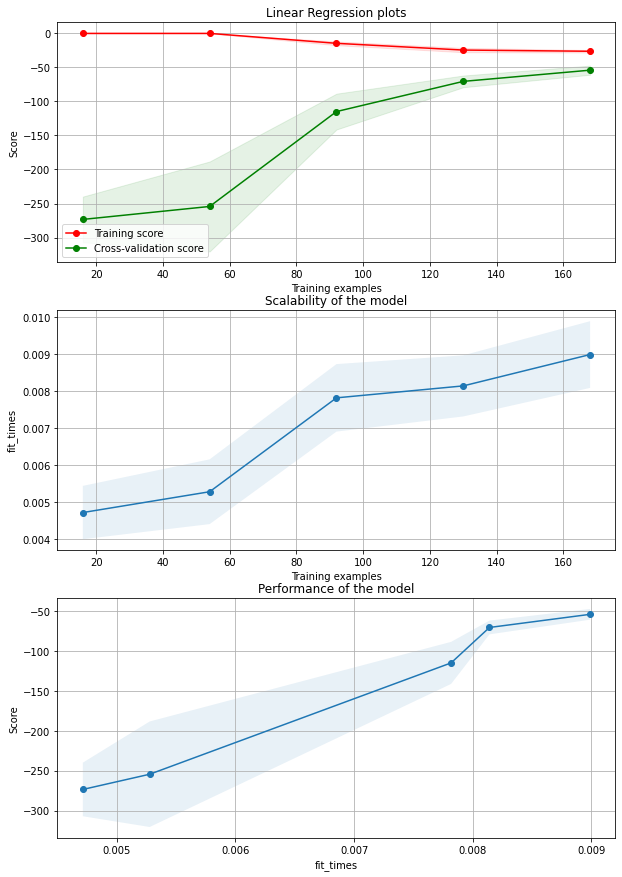

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

title = "Linear Regression plots"
cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats= n_repeats, random_state=1)

estimator = bestRegression
plot_learning_curve(estimator, title, X_train, y_train, axes=axes,
                    cv=cv, n_jobs=-1)

plt.show()

In [267]:
p= Pipeline(memory=None, steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('model', Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None, normalize=False, random_state=None, solver='auto', tol=0.001))], verbose=False)
printmetrics(p,X_test,y_test,y,X_train,y_train)
L.append(getmetrics(p,X_test,y_test,X_train,y_train))

<class 'pandas.core.frame.DataFrame'>
THE DUMMY MODEL HAS BEEN CREATED. IT PREDICTS THE VALUE OF THE DAY BEFORE.
first we get the R and adjusted r scores
Our model 0.9993115397747484 1.001278568989753
Dummy 0.9941673392796422 0.9916175422434201
That's difficult to interpret because the values are very close to each other, let's use a clearer metric here
The most interpretable one is the Mean Absolute eror
Our Model 44.8806310131525
Dummy Model 95.41666666666667
The RMSE is a metric that ressembles MAE but is more sensitive to variance.
Our model 60.5007407311057
Dummy model 180.23501072463444
Finally, lets see the expected difference, to see if our estimator is biased
Our model -1.5356099605637181
Dummy -21.401515151515152
note that the dummy is obviously going to be negatively biased because of the inflation. in fact, the quantity is the average daily inflation


Interpretation of results:
Since we value extreme precision, the R scores were not so useful because of having to look at several decimal places. We are aware of the strong explainability of the dependent variable from the indeps, what we want to see is how precise we can get the fluctuations.

This was frankly stunning. 
A 44 lira error rate is extremely close to the actual value. Note that the dummy is actuall very skilled, with a 95 prediction error. Nonetheless, our ridge regression easily outclasses it in all metrics. This is particularly in the RMSE, where we see the dummy doubling its error, which indicates a high variance. Our regressor maintains the error. Finally, on the bias, a 1 lira bias is practically nothing. The dummy has a negative bias, which makes sense because of inflation. (ie the price of tomorrow is expected to be slightly higher than today).

Also, look at these times on the graphs! As expected from linear regressors, they are extremely scalable and fit really quickly.

Interestingly, removing regularization seemed not to affect the model, except for a few select examples that blew up with scores of 10^10. Worth investigating why ridge would do that. A tiny regularization amended this issue.

NOTE, we are using the word bias here in the statistical sense, as in the Expected Difference between an estimator and the actual value.

Tree Regressor
------


Experimental setup:
- models: DecisionTreeRegressor(), XGBRegressor(), RandomForestRegressor()<br>
- Scoring used: neg_mean_absolute_score <br>
- number of splits in GridSearch and Kfold: 3 <br>
- number of repeats in GridSearch and Kfold: 3 <br>
- parameters:
              {'model__max_depth' : [1, 2, 4, 8, 12, 16, 24, 30], 
              'model__criterion' : ["mse", "mae"], 
              'model__min_impurity_decrease': [0.001, 0.01, 0.1, 0.5, 0.8]}

In [ ]:
models = [DecisionTreeRegressor(), XGBRegressor(), RandomForestRegressor()]
params = {'model__max_depth' : [1, 2, 4, 8, 12, 16, 24, 30], 
          'model__criterion' : ["mse", "mae"], 
          'model__min_impurity_decrease': [0.001, 0.01, 0.1, 0.5, 0.8]}
n_splits = 2
score = 'neg_mean_absolute_error'
TreeRegressionScores = hyper_parameter_search_given_params(models, params, n_splits, score, X_train, y_train, Scalers, Transforms[ : -1])

In [ ]:
n_splits = 3
n_repeats = 3
bestTreeRegression, bestTreeRegressionMeanScore = evaluate_regressions(TreeRegressionScores, X_train, y_train, n_splits, n_repeats, score)
print(bestTreeRegression)
print(bestTreeRegressionMeanScore)

Intermediate Poor result and learning curve diagnosis:


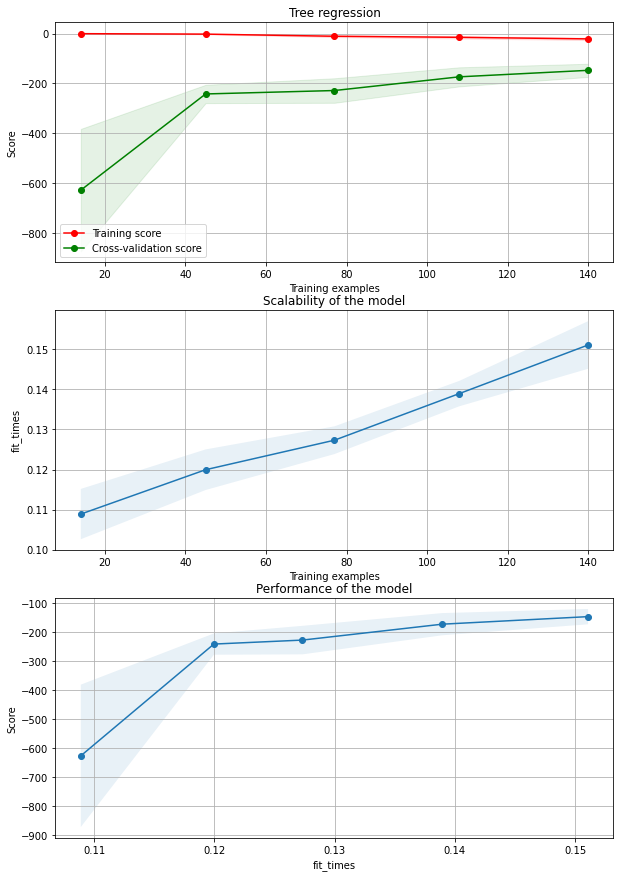

In [ ]:
p = Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('transform',
                 QuantileTransformer(copy=True, ignore_implicit_zeros=False,
                                     n_quantiles=100,
                                     output_distribution='normal',
                                     random_state=None, subsample=100000)),
                ('model',
                 DecisionTreeRegressor(criterion='mae', max_depth=6,
                                       max_features='auto', max_leaf_nodes=None,
                                       min_impurity_decrease=0.01,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       ))],
         verbose=False)

fig, axes = plt.subplots(3, 1, figsize=(10, 15))
n_splits = 3
n_repeats = 3

X=X_train
y=y_train

title = "Tree Regression Plots"
cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats= n_repeats, random_state=1)

estimator = p
plot_learning_curve(estimator, title, X, y, axes=axes,
                    cv=cv, n_jobs=-1)

plt.show()


Interpretation of the above: The trees came with a hefty 200ish error, and note the SEVERE overfitting which is frankly expected from trees on such a small dataset (we have 200 examples). As a result we immideately add bagged (forests) and boosted trees to our gridsearch and hope for better results

Chosen Candidate (Best CV Score):

Best Regression Tree Model:
Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('transform',
                 QuantileTransformer(copy=True, ignore_implicit_zeros=False,
                                     n_quantiles=100,
                                     output_distribution='normal',
                                     random_state=None, subsample=100000)),
                ('model',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mae', max_depth=6,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.01,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)


The mean error score of the chosen candidate: -102.62295271629779





Learning and efficiency curves for the candidate:

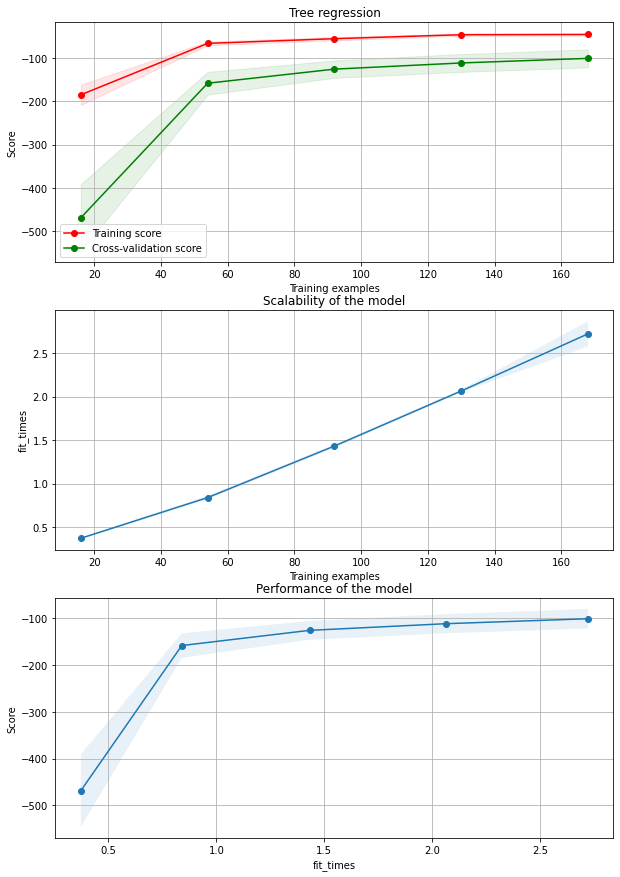

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

X=X_train
y=y_train

title = "Tree regression Plots"
cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats= n_repeats, random_state=1)

estimator = bestTreeRegression
plot_learning_curve(estimator, title, X, y, axes=axes,
                    cv=cv, n_jobs=-1)

plt.show()

In [269]:
p= Pipeline(memory=None, steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('transform', QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=100, output_distribution='normal', random_state=None, subsample=100000)), ('model', RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae', max_depth=6, max_features='auto', max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.01, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None, oob_score=False, random_state=None, verbose=0, warm_start=False))], verbose=False)
printmetrics(p,X_test,y_test,y,X_train,y_train)
L.append(getmetrics(p,X_test,y_test,X_train,y_train))

<class 'pandas.core.frame.DataFrame'>
THE DUMMY MODEL HAS BEEN CREATED. IT PREDICTS THE VALUE OF THE DAY BEFORE.
first we get the R and adjusted r scores
Our model 0.9930680486678367 1.012873623902589
Dummy 0.9941673392796422 0.9916175422434201
That's difficult to interpret because the values are very close to each other, let's use a clearer metric here
The most interpretable one is the Mean Absolute eror
Our Model 123.23679245283019
Dummy Model 95.41666666666667
The RMSE is a metric that ressembles MAE but is more sensitive to variance.
Our model 191.97691881705614
Dummy model 180.23501072463444
Finally, lets see the expected difference, to see if our estimator is biased
Our model -21.57358490566038
Dummy -21.401515151515152
note that the dummy is obviously going to be negatively biased because of the inflation. in fact, the quantity is the average daily inflation


Intrepretation of the results: The random forests outdid both the gradient boosted and regular trees. However, it is still worse than the dummy model, in terms of the absolute difference, and comparable in RMSE and bias. Overall, we believe forests failed because of a relatively small, simple dataset with many columns, for which forests do not seem suitable. They are also orders of magnitudes slower than their regressor counterparts..




SVM
------


Experimental setup:
- models: SVR() <br>
- Scoring used: neg_mean_absolute_score <br>
- number of splits in GridSearch and Kfold: 2 <br>
- number of repeats in GridSearch and Kfold: 3 <br>
- parameters:
              {'model__C': [10,100,1000],  
                'model__gamma': [0.1], 
                'model__kernel': ["linear","sigmoid"],
                'model__epsilon': [1,3,8],'model__max_iter'=[10000]'}

In [ ]:
n_splits = 2
n_repeats = 3

models = [SVR()]
params = {'model__C': [10,100,1000],  
          'model__gamma': [0.1], 
          'model__kernel': ["linear","sigmoid"],
          'model__epsilon': [1,3,8],'model__max_iter'=[10000]'}
score = 'neg_mean_absolute_error'
SvrRegressionScores = hyper_parameter_search_given_params(models, params, n_splits, score, X_train_s, y_train_s, Scalers, Transforms)

In [ ]:
bestSvrRegression, bestSvrRegressionMeanScore = evaluate_regressions(SvrRegressionScores, X_train, y_train, n_splits, n_repeats, score)
print(bestSvrRegression)
print(bestSvrRegressionMeanScore)

Intermediate Poor result and learning curve diagnosis:

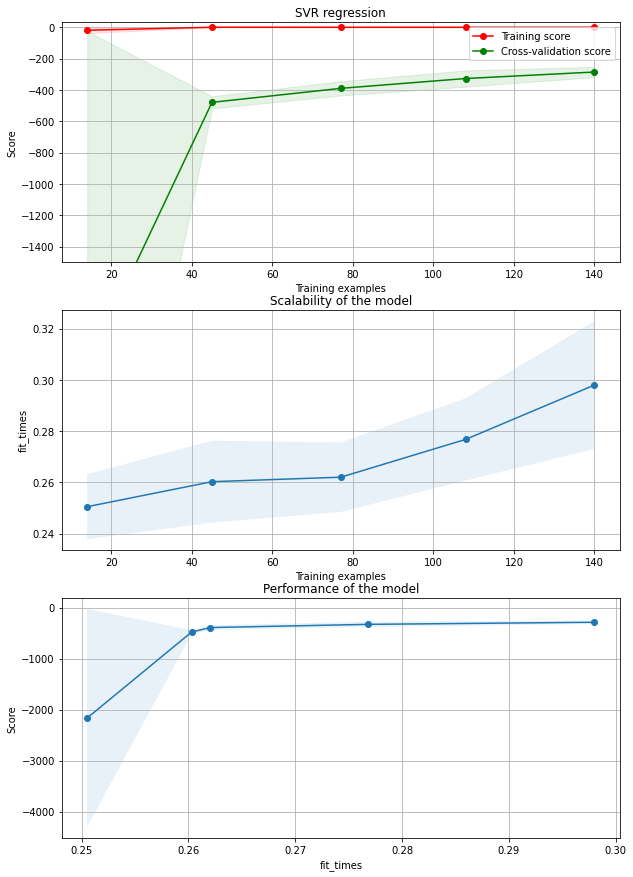

In [ ]:
pipeline = Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('transform',
                 PowerTransformer(copy=True, method='yeo-johnson',
                                  standardize=True)),
                ('model',
                 SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma=0.1, kernel='poly', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

fig, axes = plt.subplots(3, 1, figsize=(10, 15))
n_splits = 3
n_repeats = 3

X=X_train
y=y_train

title = "SVR regression"
cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats= n_repeats, random_state=1)

estimator = pipeline
plot_learning_curve(estimator, title, X, y, axes=axes,
                    cv=cv, n_jobs=-1, ylim = (-1500,30))

plt.show()

Interpretation of the above: Another poorly chosen overfitter model. Here, we applied a very targetted solution, which is increasing the street size of the svm, denoted by epsilon, forcing it to seek a larger margin of separation between examples in exchange for tolerating more error. But will it work?


Chosen Candidate (Best CV Score):

Best SVM:
Pipeline(memory=None,
         steps=[('mm', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('sd',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=3,
                     gamma=0.1, kernel='linear', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)



 The mean error score of the chosen candidate:  -66.82658507371985



Learning and efficiency curves for the candidate:





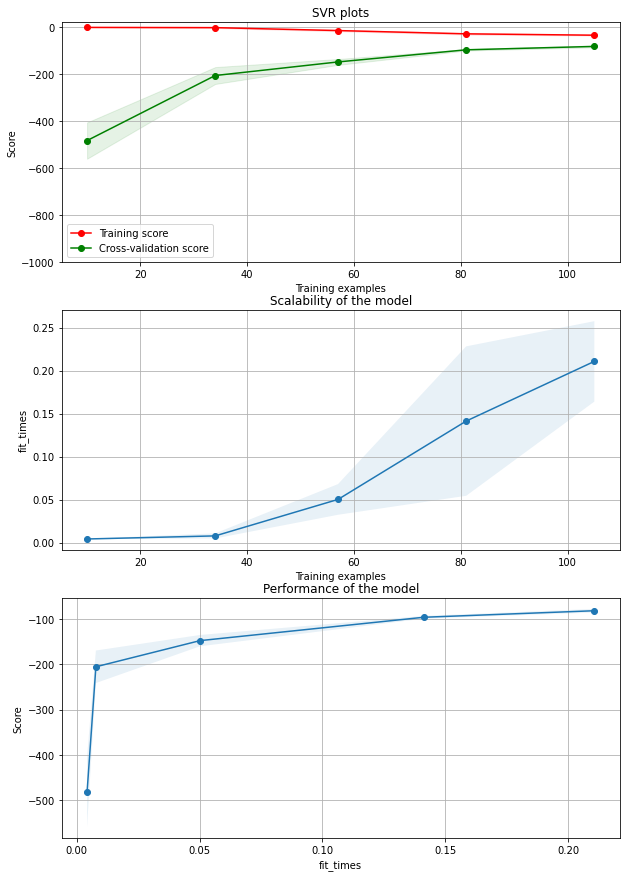

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

title = "SVR plots"
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats= 3, random_state=1)

estimator = bestSvrRegression
plot_learning_curve(estimator, title, X_train, y_train, axes=axes, ylim=(-1000,20),
                    cv=cv, n_jobs=-1)

plt.show()

In [270]:
p=  Pipeline(memory=None, steps=[('mm', MinMaxScaler(copy=True, feature_range=(0, 1))), ('sd', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=3, gamma=0.1, kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False))], verbose=False)
printmetrics(p,X_test,y_test,y,X_train,y_train)
L.append(getmetrics(p,X_test,y_test,X_train,y_train))

<class 'pandas.core.frame.DataFrame'>
THE DUMMY MODEL HAS BEEN CREATED. IT PREDICTS THE VALUE OF THE DAY BEFORE.
first we get the R and adjusted r scores
Our model 0.9984057213571063 1.0029608031939454
Dummy 0.9941673392796422 0.9916175422434201
That's difficult to interpret because the values are very close to each other, let's use a clearer metric here
The most interpretable one is the Mean Absolute eror
Our Model 63.806384066959055
Dummy Model 95.41666666666667
The RMSE is a metric that ressembles MAE but is more sensitive to variance.
Our model 92.06687001213342
Dummy model 180.23501072463444
Finally, lets see the expected difference, to see if our estimator is biased
Our model 6.8704512603652255
Dummy -21.401515151515152
note that the dummy is obviously going to be negatively biased because of the inflation. in fact, the quantity is the average daily inflation


Interpretation of the results:

It works! Including epsilon in the hyperparamter gridsearch leads to elimination of most overfitting! We get an error that beats the dummy model, and a significantly lower RMSE and bias. However, we still note that linear regression handily beats this model, especially with its superior runtimes. Can the neural networks do anything to stop this?

Experimental setup:
- models: MLPRegressor() <br>
- Scoring used: neg_mean_absolute_score <br>
- number of splits in GridSearch and Kfold: 3 <br>
- number of repeats in GridSearch and Kfold: 3 <br>
- parameters:
              {'model__alpha': [100,0.01],  
               'model__batch_size': [20,250],'model__max_iter':[100], 
               'model__hidden_layer_sizes':[(40,)],'model__learning_rate_init':[0.1,0.2]}

Here I would like to note that the gridsearch also covered different types of activations and hidden layers, but we eliminated them after observing "unpromising" results (see awful graph) to speed up the rest of the optimization.

In [ ]:
n_splits = 3
n_repeats = 3

models = [MLPRegressor()]
params = {'model__alpha': [100,0.01],  
          'model__batch_size': [20,250],'model__max_iter':[100], 'model__hidden_layer_sizes':[(40,)],'model__learning_rate_init':[0.1,0.2]}
score = 'neg_mean_absolute_error'
nnRegressionScores = hyper_parameter_search_given_params(models, params, n_splits, score, X_train, y_train, Scalers, Transforms)
print(nnRegressionScores)


In [ ]:
bestNnRegression, bestNnRegressionMeanScore = evaluate_regressions(nnRegressionScores, X_train, y_train, n_splits, n_repeats, score)
print(bestNnRegression)
print(bestNnRegressionMeanScore)

Poor Intermediate Results:

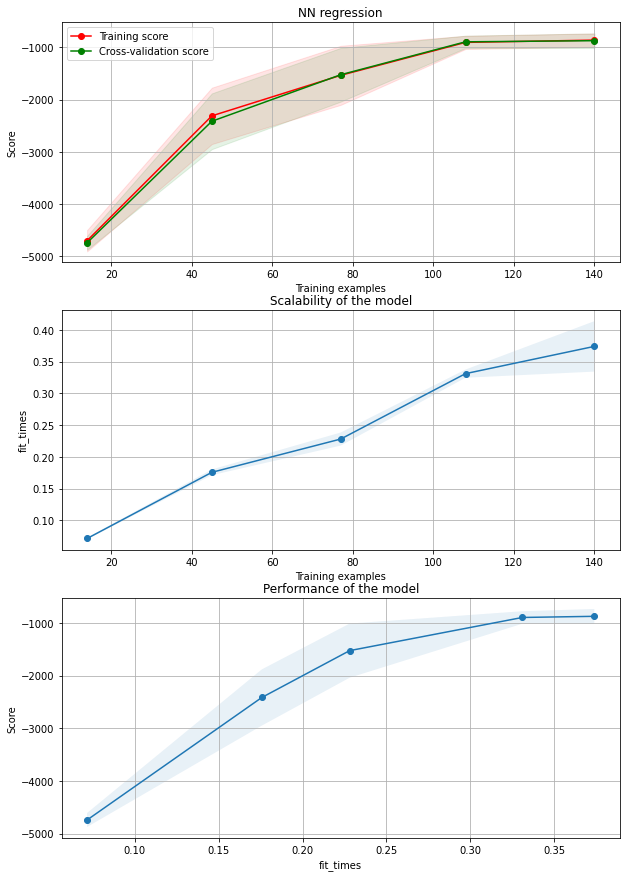

In [ ]:
pipeline=Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 MLPRegressor(activation='relu', alpha=1000, batch_size=20,
                              beta_1=0.9, beta_2=0.999, early_stopping=False,
                              epsilon=1e-08, hidden_layer_sizes=(10,),
                              learning_rate='constant', learning_rate_init=0.01,
                              max_fun=15000, max_iter=100, momentum=0.9,
                              n_iter_no_change=10, nesterovs_momentum=True,
                              power_t=0.5, random_state=None, shuffle=True,
                              solver='adam', tol=0.0001,
                              validation_fraction=0.1, verbose=False,
                              warm_start=False))],
         verbose=False)

fig, axes = plt.subplots(3, 1, figsize=(10, 15))
n_splits = 3
n_repeats = 3

X=X_train
y=y_train

title = "NN regression"
cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats= n_repeats, random_state=1)

estimator = pipeline
plot_learning_curve(estimator, title, X, y, axes=axes,
                    cv=cv, n_jobs=-1)

plt.show()

Interpretation of the above:
This is a really weird graph, and happened because of probably too heavy regularization (alpha 1000). Guess we were too nervous about neural network's reputations for being master overfitters that we went overboard with the regularization. It's curious that the model is unable to fit perfectly even to the lowest number of training sets, and actually does better the more training we add. My only possible explanation is that its only capable of predicting the simplest types of statistics on the data, which are better represented the more training we get.

Chosen Candidate (Best CV Score):



best Neural Network:
Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 MLPRegressor(activation='relu', alpha=100, batch_size=20,
                              beta_1=0.9, beta_2=0.999, early_stopping=False,
                              epsilon=1e-08, hidden_layer_sizes=(40,),
                              learning_rate='constant', learning_rate_init=0.1,
                              max_fun=15000, max_iter=100, momentum=0.9,
                              n_iter_no_change=10, nesterovs_momentum=True,
                              power_t=0.5, random_state=None, shuffle=True,
                              solver='adam', tol=0.0001,
                              validation_fraction=0.1, verbose=False,
                              warm_start=False))],
         verbose=False)


 The mean error score of the chosen candidate: -112.40196556690474





Learning and efficiency curves for the candidate:



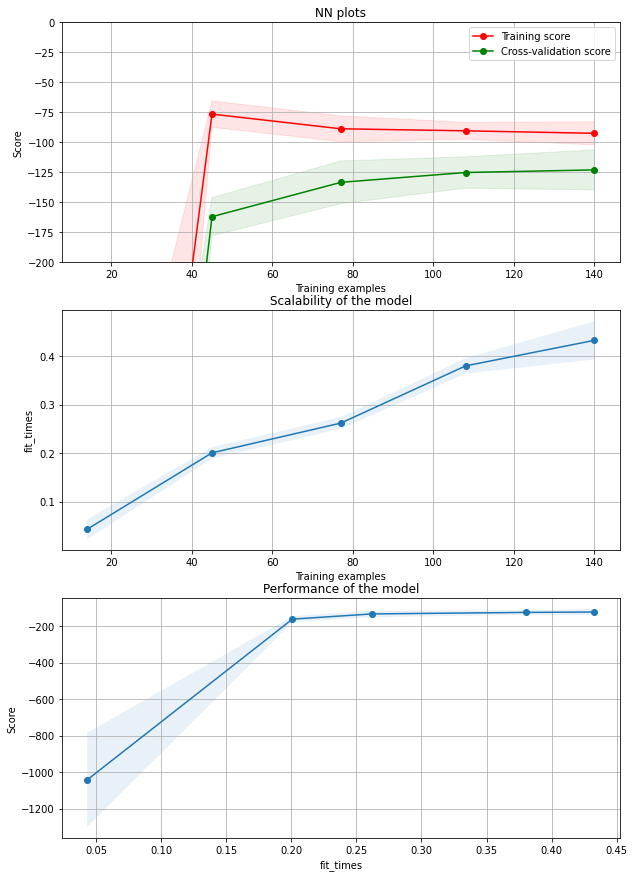

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

title = "NN plots"
cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats= n_repeats, random_state=1)

estimator = bestNnRegression
plot_learning_curve(estimator, title, X_train, y_train, axes=axes, ylim=(-200,0),
                    cv=cv, n_jobs=-1)

plt.show()

In [271]:
p=Pipeline(memory=None, steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('model', MLPRegressor(activation='relu', alpha=100, batch_size=20, beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08, hidden_layer_sizes=(40,), learning_rate='constant', learning_rate_init=0.1, max_fun=15000, max_iter=100, momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5, random_state=None, shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False, warm_start=False))], verbose=False)
printmetrics(p,X_test,y_test,y,X_train,y_train)
L.append(getmetrics(p,X_test,y_test,X_train,y_train))

<class 'pandas.core.frame.DataFrame'>
THE DUMMY MODEL HAS BEEN CREATED. IT PREDICTS THE VALUE OF THE DAY BEFORE.
first we get the R and adjusted r scores
Our model 0.9951939533352562 1.0089255152345242
Dummy 0.9941673392796422 0.9916175422434201
That's difficult to interpret because the values are very close to each other, let's use a clearer metric here
The most interpretable one is the Mean Absolute eror
Our Model 122.88286098541131
Dummy Model 95.41666666666667
The RMSE is a metric that ressembles MAE but is more sensitive to variance.
Our model 159.85096273747197
Dummy model 180.23501072463444
Finally, lets see the expected difference, to see if our estimator is biased
Our model 48.38114919074134
Dummy -21.401515151515152
note that the dummy is obviously going to be negatively biased because of the inflation. in fact, the quantity is the average daily inflation


Interpretation of the results:
Even after ages of fine tuning, this is the best we got. At this point, we decide that maybe this problem isnt so well suited to deep learning. As a hail mary, we decide to try some bagged neural networks.

Bagged Neural Networks
-----


In [ ]:
from sklearn.ensemble import BaggingRegressor
n_splits = 3
n_repeats = 3
regr = BaggingRegressor(base_estimator=MLPRegressor(activation='relu', alpha=100, batch_size=20,
                              beta_1=0.9, beta_2=0.999, early_stopping=False,
                              epsilon=1e-08, hidden_layer_sizes=(40,),
                              learning_rate='constant', learning_rate_init=0.1,
                              max_fun=15000, max_iter=100, momentum=0.9,
                              n_iter_no_change=10, nesterovs_momentum=True,
                              power_t=0.5, random_state=None, shuffle=True,
                              solver='adam', tol=0.0001,
                              validation_fraction=0.1, verbose=False,
                              warm_start=False),random_state=0)
models = [regr]
params = {'model__n_estimators':[5,10]}
nnRegressionScores = hyper_parameter_search_given_params(models, params, n_splits, score, X_train, y_train, Scalers, Transforms)
print(nnRegressionScores)

In [ ]:
bestNnRegression, bestNnRegressionMeanScore = evaluate_regressions(nnRegressionScores, X_train, y_train, n_splits, n_repeats, score)
print(bestNnRegression)
print(bestNnRegressionMeanScore)

Chosen Candidate (Best CV Score):

Best Neural Network with bagging: 
Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 BaggingRegressor(base_estimator=MLPRegressor(activation='relu',
                                                              alpha=100,
                                                              batch_size=20,
                                                              beta_1=0.9,
                                                              beta_2=0.999,
                                                              early_stopping=False,
                                                              epsilon=1e-08,
                                                              hidden_layer_sizes=(40,),
                                                              learning_rate='constant',
                                                              learning_rate_init=0.1,
                                                              max_fun=15000,
                                                              max_iter=100,
                                                              momentum=0.9,
                                                              n_iter_no_change=10,
                                                              nesterovs_momentum=True,
                                                              power_t=0.5,
                                                              random_state=None,
                                                              shuffle=True,
                                                              solver='adam',
                                                              tol=0.0001,
                                                              validation_fraction=0.1,
                                                              verbose=False,
                                                              warm_start=False),
                                  bootstrap=True, bootstrap_features=False,
                                  max_features=1.0, max_samples=1.0,
                                  n_estimators=10, n_jobs=None, oob_score=False,
                                  random_state=0, verbose=0,
                                  warm_start=False))],
         verbose=False)


 The mean error score of the chosen candidate: -107.56128987397584

Learning and efficiency curves for the candidate:

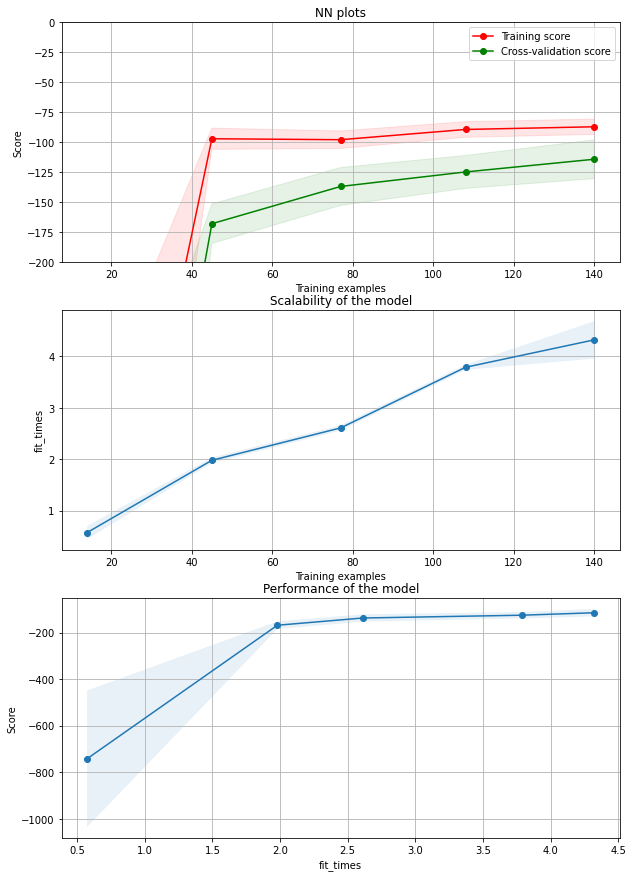

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

title = "NN plots"
cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats= n_repeats, random_state=1)

estimator = bestNnRegression
plot_learning_curve(estimator, title, X_train, y_train, axes=axes, ylim=(-200,0),
                    cv=cv, n_jobs=-1)

plt.show()

In [272]:
p=Pipeline(memory=None, steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('model', BaggingRegressor(base_estimator=MLPRegressor(activation='relu', alpha=100, batch_size=20, beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08, hidden_layer_sizes=(40,), learning_rate='constant', learning_rate_init=0.1, max_fun=15000, max_iter=100, momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5, random_state=None, shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False, warm_start=False), bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False, random_state=0, verbose=0, warm_start=False))], verbose=False)
printmetrics(p,X_test,y_test,y,X_train,y_train)
L.append(getmetrics(p,X_test,y_test,X_train,y_train))

<class 'pandas.core.frame.DataFrame'>
THE DUMMY MODEL HAS BEEN CREATED. IT PREDICTS THE VALUE OF THE DAY BEFORE.
first we get the R and adjusted r scores
Our model 0.9956290831083232 1.0081174170845426
Dummy 0.9941673392796422 0.9916175422434201
That's difficult to interpret because the values are very close to each other, let's use a clearer metric here
The most interpretable one is the Mean Absolute eror
Our Model 105.64640384181804
Dummy Model 95.41666666666667
The RMSE is a metric that ressembles MAE but is more sensitive to variance.
Our model 152.44301831535088
Dummy model 180.23501072463444
Finally, lets see the expected difference, to see if our estimator is biased
Our model -13.343574132317414
Dummy -21.401515151515152
note that the dummy is obviously going to be negatively biased because of the inflation. in fact, the quantity is the average daily inflation


There is a marginal improvement, and we have a better RMSE than the dummy, but still lose out in absolute mean to both the dummy and linear regression.

This is better than neural networks at first sight. However, the training times were absolutely atrocious, and this model will not be analyzed any further because the accuracy is low for such a slow thing.

New Features
------


So linear regression is the king of the hill. Can reduced features change that? Our prediction: No, linear regression will still be king. Features reduced from 53 to 17.

In [ ]:
df3 = pd.read_csv("/content/drive/My Drive/CMPS276/kbest.csv")
df3.set_index("Unnamed: 0",drop=True, inplace=True)

In [ ]:
X_selected = df3.drop("BM Buy", axis=1)
y_selected = df3["BM Buy"]
columns = X_selected.columns
X_selected.head()

,buy_15_min,buy_10_min,buy_15_mean,buy_15_emean,buy_10_mean,buy_15_max,buy_10_emean,buy_5_min,buy_10_max,buy_5_mean,buy_5_max,buy_5_emean,buy_1,ekfdollar,alfلبنان,alfلبنان_ينتفض,akfمصرف
Unnamed: 0,,,,,,,,,,,,,,,,,
2020-01-23,2131.551474,2134.258401,2179.571515,2100.000000,2149.379537,2290.850608,2100.000000,2154.248915,2177.002773,2152.080566,2168.897569,2100.000000,2100.0,0.131944,0.815,0.193,0.434511
2020-01-24,2131.551474,2134.258401,2179.571515,2106.250000,2149.379537,2290.850608,2109.090909,2154.248915,2177.362922,2153.083344,2168.897569,2116.666667,2150.0,0.095890,0.815,0.193,0.434511
2020-01-25,2132.081467,2105.938360,2176.937096,2111.718750,2149.379537,2290.850608,2116.528926,2154.248915,2177.362922,2152.080566,2169.119577,2127.777778,2150.0,0.070632,0.729,0.206,0.536481
2020-01-26,2104.295484,2105.595846,2173.382490,2117.753906,2149.379537,2290.363875,2124.432757,2154.248915,2176.002773,2152.080566,2169.400568,2138.518519,2160.0,0.095890,0.729,0.294,0.635417
2020-01-27,2104.295484,2105.938360,2170.329373,2123.034668,2148.403186,2290.363875,2130.899529,2100.000000,2175.469377,2144.000000,2160.000000,2145.679012,2160.0,0.109375,0.734,0.206,0.536481


In [ ]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_selected, y_selected, train_size = 0.8, random_state = 42)

Experiment setup:
- Models used: Lasso() and Ridge() <br>
- Scoring used: neg_mean_absolute_score <br>
- number of splits in GridSearch and Kfold: 5 <br>
- number of repeats in GridSearch and Kfold: 3 <br>
- parameters:
             {'model__alpha':[0,.01,.05,.1,.5,1,5,10, 20]}

In [ ]:
models = [Lasso(), Ridge()]
params={'model__alpha':[0,.01,.05,.1,.5,1,5,10, 20]}
n_splits = 5
score = 'neg_mean_absolute_error'
regressionScores_s = hyper_parameter_search_given_params(models, params, n_splits, score, X_train_s, y_train_s, Scalers, Transforms) 

In [ ]:
n_repeats = 3
bestRegression_s, bestRegressionMeanScore_s = evaluate_regressions(regressionScores_s, X_train_s, y_train_s, n_splits, n_repeats, score)
print(bestRegression_s)
print(bestRegressionMeanScore_s)

Chosen Candidate (Best CV Score):

Best Regression Neglecting features:
Pipeline(memory=None,
         steps=[('mm', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('sd',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 Lasso(alpha=5, copy_X=True, fit_intercept=True, max_iter=1000,
                       normalize=False, positive=False, precompute=False,
                       random_state=None, selection='cyclic', tol=0.0001,
                       warm_start=False))],
         verbose=False)


 The mean error score of the chosen candidate: -107.101030273313

Learning and efficiency curves for the candidate:

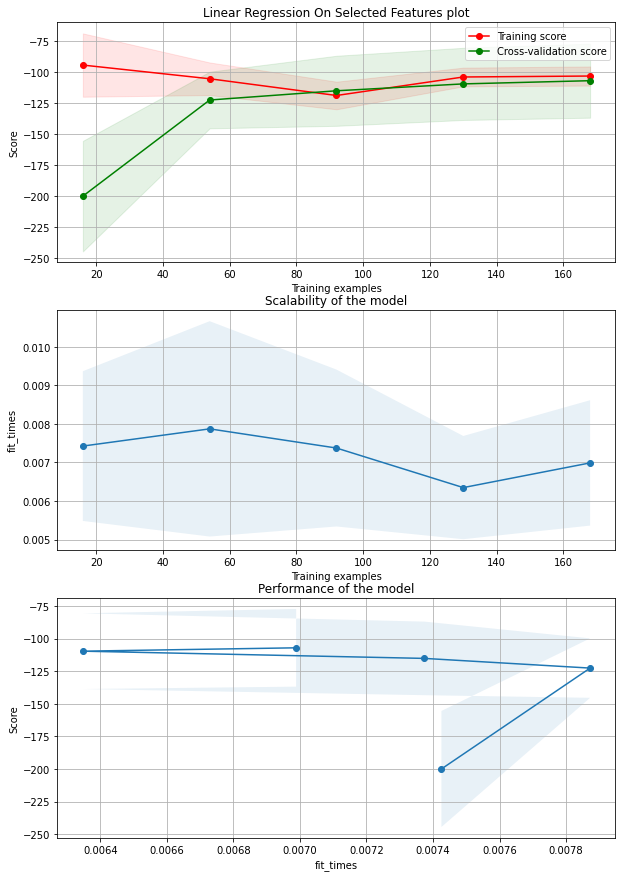

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

title = "Linear Regression On Selected Features plot"
cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats= n_repeats, random_state=1)

estimator = bestRegression_s
plot_learning_curve(estimator, title, X_train_s, y_train_s, axes=axes,
                    cv=cv, n_jobs=-1)

plt.show()

In [273]:
p=Pipeline(memory=None, steps=[('mm', MinMaxScaler(copy=True, feature_range=(0, 1))), ('sd', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', Lasso(alpha=5, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=None, selection='cyclic', tol=0.0001, warm_start=False))], verbose=False)
printmetrics(p,X_test_s,y_test_s,y_selected,X_train_s,y_train_s)
L.append(getmetrics(p,X_test_s,y_test_s,X_train_s,y_train_s))

<class 'pandas.core.frame.DataFrame'>
THE DUMMY MODEL HAS BEEN CREATED. IT PREDICTS THE VALUE OF THE DAY BEFORE.
first we get the R and adjusted r scores
Our model 0.9935448824246228 1.011988075497129
Dummy 0.9941673392796422 0.9916175422434201
That's difficult to interpret because the values are very close to each other, let's use a clearer metric here
The most interpretable one is the Mean Absolute eror
Our Model 99.27362821896531
Dummy Model 95.41666666666667
The RMSE is a metric that ressembles MAE but is more sensitive to variance.
Our model 185.25645236393387
Dummy model 180.23501072463444
Finally, lets see the expected difference, to see if our estimator is biased
Our model 11.402297621511737
Dummy -21.401515151515152
note that the dummy is obviously going to be negatively biased because of the inflation. in fact, the quantity is the average daily inflation


Wow. The features made things worse. We had a long deep discussion on why this happened. Eventually, our consensus was that, in reality both models are doing well if you look at R scores. However, since our definition of well requires a very fine, and nuanced prediction, even losing "5% of the variance" will create a huge disruption in our prediction. Ex, 5% of 7000 is 350, which is enough to send out error from 50 to 400. The RMSE shot up! This indicates instability. Fortunately that did not happen, but we came to realize that the loss of clinical accuracy enjoyed by the previous regression was to be expected perhaps. Will this trend continue? It did not become much faster

TreeRegressor
-----

Experimental setup:
- models: DecisionTreeRegressor(), XGBRegressor(), RandomForestRegressor()<br>
- Scoring used: neg_mean_absolute_score <br>
- number of splits in GridSearch and Kfold: 2/3 <br>
- number of repeats in GridSearch and Kfold: 3 <br>
- parameters:
              {'model__max_depth' : [1, 2, 4, 8, 12, 16, 24, 30], 
              'model__criterion' : ["mse", "mae"], 
              'model__min_impurity_decrease': [0.001, 0.01, 0.1, 0.5, 0.8]}

In [ ]:
models = [DecisionTreeRegressor(), XGBRegressor(), RandomForestRegressor()]
params = {'model__max_depth' : [1, 2, 4, 8, 12, 16, 24, 30], 
          'model__criterion' : ["mse", "mae"], 
          'model__min_impurity_decrease': [0.001, 0.01, 0.1, 0.5, 0.8]}
n_splits = 2
score = 'neg_mean_absolute_error'
TreeRegressionScores_s = hyper_parameter_search_given_params(models, params, n_splits, score, X_train_s, y_train_s, Scalers, Transforms[ : -1])

In [ ]:
n_splits = 3
n_repeats = 3
bestTreeRegression_s, bestTreeRegressionMeanScore_s = evaluate_regressions(TreeRegressionScores_s, X_train_s, y_train_s, n_splits, n_repeats, score)
print(bestTreeRegression_s)
print(bestTreeRegressionMeanScore_s)

Chosen Candidate (Best CV Score):

Best Tree Regression With FS:
Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=24,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.8,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)



 The mean error score of the chosen candidate: -112.14693937244824


Learning and efficiency curves for the candidate:

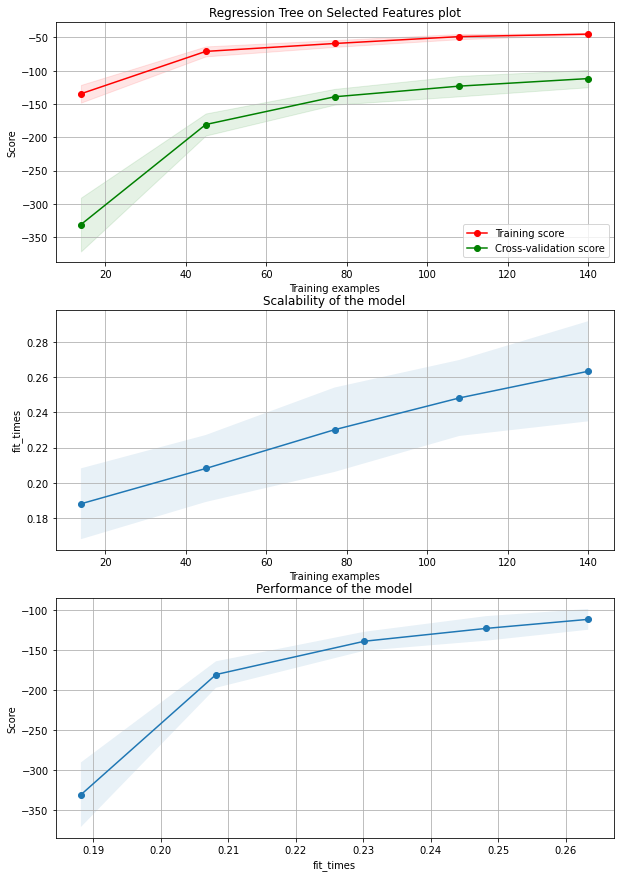

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

title = "Regression Tree on Selected Features plot"
cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats= n_repeats, random_state=1)

estimator = bestTreeRegression_s
plot_learning_curve(estimator, title, X_train_s, y_train_s, axes=axes, cv=cv, n_jobs=-1)

plt.show()

In [274]:
p=Pipeline(memory=None, steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('model', RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=24, max_features='auto', max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.8, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None, oob_score=False, random_state=None, verbose=0, warm_start=False))], verbose=False)
printmetrics(p,X_test_s,y_test_s,y_selected,X_train_s,y_train_s)
L.append(getmetrics(p,X_test_s,y_test_s,X_train_s,y_train_s))

<class 'pandas.core.frame.DataFrame'>
THE DUMMY MODEL HAS BEEN CREATED. IT PREDICTS THE VALUE OF THE DAY BEFORE.
first we get the R and adjusted r scores
Our model 0.9917140548998808 1.0153881837573642
Dummy 0.9941673392796422 0.9916175422434201
That's difficult to interpret because the values are very close to each other, let's use a clearer metric here
The most interpretable one is the Mean Absolute eror
Our Model 116.64679997675279
Dummy Model 95.41666666666667
The RMSE is a metric that ressembles MAE but is more sensitive to variance.
Our model 209.89026232423603
Dummy model 180.23501072463444
Finally, lets see the expected difference, to see if our estimator is biased
Our model -6.593253538913908
Dummy -21.401515151515152
note that the dummy is obviously going to be negatively biased because of the inflation. in fact, the quantity is the average daily inflation


Intrepretation of the results: The forests did not worsen much with feature elimination. This is likely because restrictions on their depth mean they can only be computed with a subset of features anyways. The times didn't change much either. Overall still not a great predictor, there is too much variance (both the statistical and ML type) as indicated by the learning curves and the RMSE.

SVR
-----


Experimental setup:
- models: SVR()<br>
- Scoring used: neg_mean_absolute_score <br>
- number of splits in GridSearch and Kfold: 2 <br>
- number of repeats in GridSearch and Kfold: 3 <br>
- parameters:
              {'model__C': [10,100,1000],  
              'model__gamma': [0.1], 
              'model__kernel': ["linear","sigmoid"],
              'model__epsilon': [1,3,8],'model__max_iter':[10000]}

In [ ]:
n_splits = 2
n_repeats = 3

models = [SVR()]
params = {'model__C': [10,100,1000],  
          'model__gamma': [0.1], 
          'model__kernel': ["linear","sigmoid"],
          'model__epsilon': [1,3,8],'model__max_iter':[10000]}
score = 'neg_mean_absolute_error'
SvrRegressionScores_s = hyper_parameter_search_given_params(models, params, n_splits, score, X_train_s, y_train_s, Scalers, Transforms)

In [ ]:
bestSvrRegression_s, bestSvrRegressionMeanScore_s = evaluate_regressions(SvrRegressionScores_s, X_train_s, y_train_s, n_splits, n_repeats, score)
print(bestSvrRegression_s)
print(bestSvrRegressionMeanScore_s)

Chosen Candidate (Best CV Score):

Best SVR with FS:
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=3,
                     gamma=0.1, kernel='linear', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)


 The mean error score of the chosen candidate:-106.36647869552225

Learning and efficiency curves for the candidate:

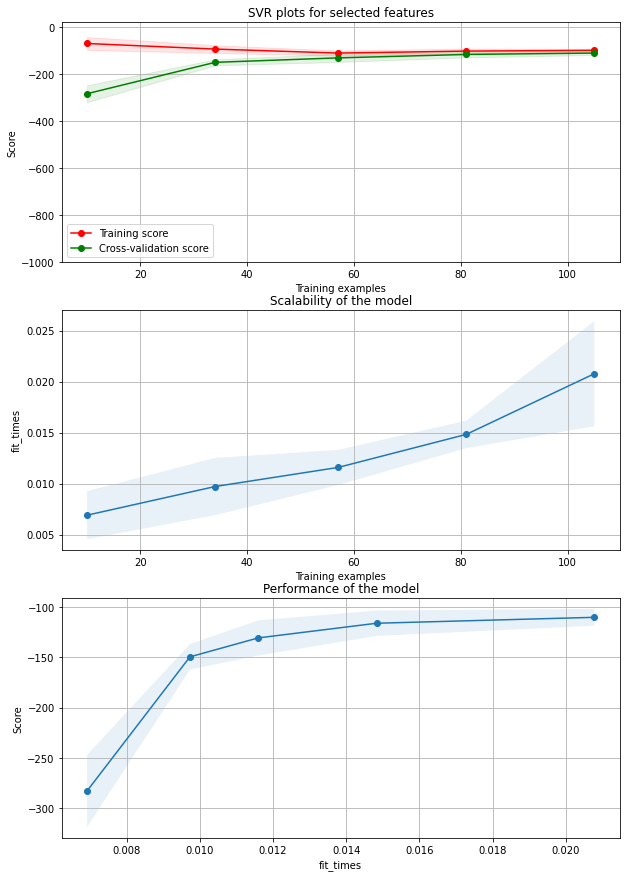

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

title = "SVR plots for selected features"
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats= 3, random_state=1)

estimator = bestSvrRegression_s
plot_learning_curve(estimator, title, X_train_s, y_train_s, axes=axes, ylim=(-1000,20),
                    cv=cv, n_jobs=-1)

plt.show()

In [275]:
p=Pipeline(memory=None, steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=3, gamma=0.1, kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False))], verbose=False)
printmetrics(p,X_test_s,y_test_s,y_selected,X_train_s,y_train_s)
L.append(getmetrics(p,X_test_s,y_test_s,X_train_s,y_train_s))

<class 'pandas.core.frame.DataFrame'>
THE DUMMY MODEL HAS BEEN CREATED. IT PREDICTS THE VALUE OF THE DAY BEFORE.
first we get the R and adjusted r scores
Our model 0.9939328239469265 1.0112676126699935
Dummy 0.9941673392796422 0.9916175422434201
That's difficult to interpret because the values are very close to each other, let's use a clearer metric here
The most interpretable one is the Mean Absolute eror
Our Model 95.68494310558289
Dummy Model 95.41666666666667
The RMSE is a metric that ressembles MAE but is more sensitive to variance.
Our model 179.60340385462806
Dummy model 180.23501072463444
Finally, lets see the expected difference, to see if our estimator is biased
Our model -6.292074840305261
Dummy -21.401515151515152
note that the dummy is obviously going to be negatively biased because of the inflation. in fact, the quantity is the average daily inflation


The graphs show that the train and test set really match each other.Unfortunately this new SVM is worse than the dummy model, but notably better than the linear regression on the selected features. We do believe that the lack of features is reducing bias, as the SVM doesn't show significant difference between training and test but still doesn't do a great job.

Neural Networks
-----


In [ ]:
n_splits = 3
n_repeats = 3

models = [MLPRegressor()]
params = {'model__alpha': [1000,500],  
          'model__batch_size': [20,250],'model__max_iter':[100], 'model__hidden_layer_sizes':[(40,)],'model__learning_rate_init':[0.1,0.2]}
score = 'neg_mean_absolute_error'
nnRegressionScores = hyper_parameter_search_given_params(models, params, n_splits, score, X_train_s, y_train_s, Scalers, Transforms)

In [ ]:
bestNnRegression, bestNnRegressionMeanScore = evaluate_regressions(nnRegressionScores, X_train_s, y_train_s, n_splits, n_repeats, score)
print(bestNnRegression)
print(bestNnRegressionMeanScore)

Chosen Candidate (Best CV Score):

Best Neural Network FS:
Pipeline(memory=None,
         steps=[('mm', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('sd',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('trans',
                 PowerTransformer(copy=True, method='yeo-johnson',
                                  standardize=True)),
                ('model',
                 MLPRegressor(activation='relu', alpha=500, batch_size=20,
                              beta_1=0.9, beta_2=0.999, early_stopping=False,
                              epsilon=1e-08, hidden_layer_sizes=(40,),
                              learning_rate='constant', learning_rate_init=0.1,
                              max_fun=15000, max_iter=100, momentum=0.9,
                              n_iter_no_change=10, nesterovs_momentum=True,
                              power_t=0.5, random_state=None, shuffle=True,
                              solver='adam', tol=0.0001,
                              validation_fraction=0.1, verbose=False,
                              warm_start=False))],
         verbose=False)


 The mean error score of the chosen candidate: -149.97224389664385

Learning and efficiency curves for the candidate:

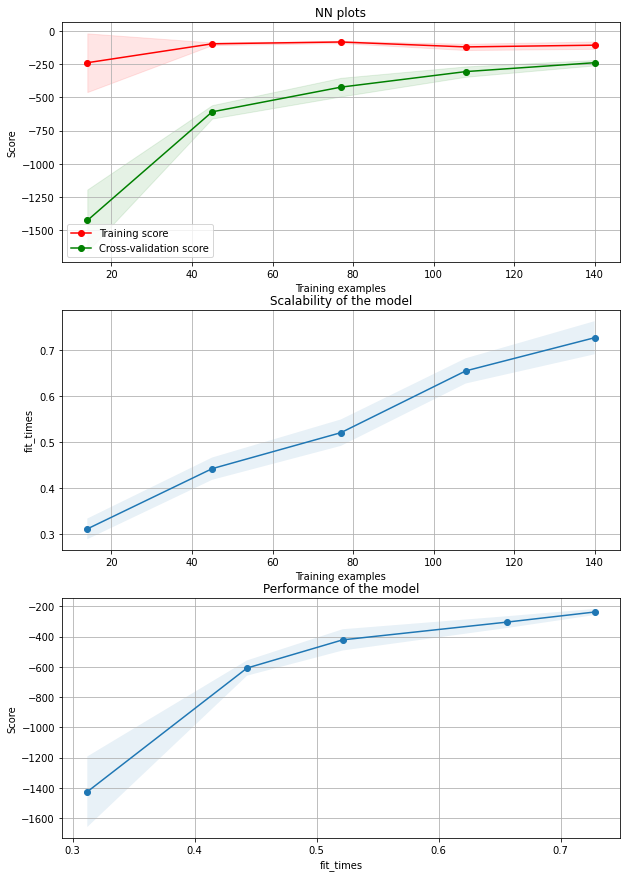

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

title = "NN plots"
cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats= n_repeats, random_state=1)

estimator = bestNnRegression
plot_learning_curve(estimator, title, X_train, y_train, axes=axes,
                    cv=cv, n_jobs=-1)

plt.show()

In [276]:


p=Pipeline(memory=None, steps=[('mm', MinMaxScaler(copy=True, feature_range=(0, 1))), ('sd', StandardScaler(copy=True, with_mean=True, with_std=True)), ('trans', PowerTransformer(copy=True, method='yeo-johnson', standardize=True)), ('model', MLPRegressor(activation='relu', alpha=500, batch_size=20, beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08, hidden_layer_sizes=(40,), learning_rate='constant', learning_rate_init=0.1, max_fun=15000, max_iter=100, momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5, random_state=None, shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False, warm_start=False))], verbose=False)
printmetrics(p,X_test_s,y_test_s,y_selected,X_train_s,y_train_s)
L.append(getmetrics(p,X_test_s,y_test_s,X_train_s,y_train_s))



<class 'pandas.core.frame.DataFrame'>
THE DUMMY MODEL HAS BEEN CREATED. IT PREDICTS THE VALUE OF THE DAY BEFORE.
first we get the R and adjusted r scores
Our model 0.9923199249267283 1.0142629965646475
Dummy 0.9941673392796422 0.9916175422434201
That's difficult to interpret because the values are very close to each other, let's use a clearer metric here
The most interpretable one is the Mean Absolute eror
Our Model 149.41197765999496
Dummy Model 95.41666666666667
The RMSE is a metric that ressembles MAE but is more sensitive to variance.
Our model 202.07100305386447
Dummy model 180.23501072463444
Finally, lets see the expected difference, to see if our estimator is biased
Our model -25.104641565092102
Dummy -21.401515151515152
note that the dummy is obviously going to be negatively biased because of the inflation. in fact, the quantity is the average daily inflation


Regression on low features and low data, coupled with a neural network that has the capacity for a thousand paramters is a recipe for disaster. We tried, but weren't able to significantly reduce the error over here.

Data Summaries:


Wow! That was exhausting! Let's reprint a summary of all model's errors and make some final conclusions

In [294]:

print(L)
df=pd.DataFrame(L)
sti=['Linear','Forest','SVM','NN','NNbag','LinearSel','Forestsel','SVMsel','NNsel','dummy']
df['Name']=sti
df=df.set_index('Name')
print(df)

[{'r^2': 0.9993115397747484, 'adj_r^2': 1.001278568989753, 'MAE': 44.8806310131525, 'RMSE': 60.5007407311057, 'Av Bias': -1.5356099605637181}, {'r^2': 0.9933812902979076, 'adj_r^2': 1.0122918894467432, 'MAE': 115.7188679245283, 'RMSE': 187.5892431642694, 'Av Bias': -16.983018867924535}, {'r^2': 0.9984057213571063, 'adj_r^2': 1.0029608031939454, 'MAE': 63.806384066959055, 'RMSE': 92.06687001213342, 'Av Bias': 6.8704512603652255}, {'r^2': 0.9952764712329395, 'adj_r^2': 1.0087722677102553, 'MAE': 118.57878299955128, 'RMSE': 158.47273268294177, 'Av Bias': 42.84940989331254}, {'r^2': 0.9956290831083232, 'adj_r^2': 1.0081174170845426, 'MAE': 105.64640384181804, 'RMSE': 152.44301831535088, 'Av Bias': -13.343574132317414}, {'r^2': 0.9935448824246228, 'adj_r^2': 1.011988075497129, 'MAE': 99.27362821896531, 'RMSE': 185.25645236393387, 'Av Bias': 11.402297621511737}, {'r^2': 0.9916592779433478, 'adj_r^2': 1.0154899123909253, 'MAE': 119.34111110849315, 'RMSE': 210.5828936877751, 'Av Bias': -4.3323

In reiteration, the R^2 and adj r^2 scores are irrelevant, because we were interested in very fine predictions. As a reuslt, the most important metrics were the last three, with MAE being our chosen main metric due to its intuitive interpretation. The only two models that managed to beat the dummy are SVM and Linear, both on many features. We believe this is no coincidence, both models are known for being far simpler than their tree and neural network counterparts and far **far** more robust. 

Ultimately, our humble linear regression on all features won out. We believe that the recipe for its sucess was in its use of all features, including the nuanced ones that may not have had a huge impact (note the final chosen model had an extremely low regularization constant), as well as the fact that it tends not to overfit, and is FAST and simple to diagnose.

The final error was 45 vs 95, a significant, more than twice as accurate predictor, and we are pleased with our result.

Examining our star performer the linear regression for curiosity:

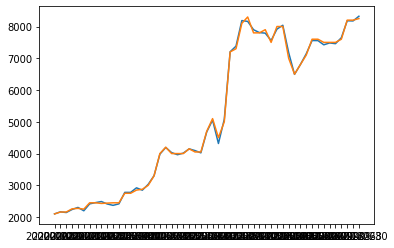

In [25]:
p=Pipeline(memory=None, steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('model', Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None, normalize=False, random_state=None, solver='auto', tol=0.001))], verbose=False)
p.fit(X_train,y_train)
#plt.bar(X_train.columns,p['model'].coef_)
ok=copy.deepcopy(X_test)
ok['y']=y_test
ok=ok.sort_index()
y_predict=p.predict(ok.drop('y',axis=1))


plt.plot(ok.index,y_predict)
#plt.ylim(4000,5000)
plt.plot(ok.index,ok['y'])





In [22]:
v=[(p['model'].coef_[i],X_test.columns[i]) for i in range(len(X_test))]
v.sort()
print(v)


Index(['weekday1', 'weekday2', 'weekday3', 'weekday4', 'weekday5', 'weekday6',
       'Cheque Buy', 'Cheque Sell', 'Bank', 'SyndicateB', 'SyndicateS',
       'ParallelS', 'SyrianRate', 'Confirmed Cases', 'Recovered Cases',
       'Recorded Deaths', 'buy_1', 'buy_5_mean', 'buy_10_mean', 'buy_15_mean',
       'buy_5_10', 'buy_10_15', 'buy_5_15', 'buy_5_max', 'buy_10_max',
       'buy_15_max', 'buy_5_min', 'buy_10_min', 'buy_15_min', 'buy_5_std',
       'buy_10_std', 'buy_15_std', 'buy_5_emean', 'buy_10_emean',
       'buy_15_emean', 'buy_return_1', 'buy_return_5', 'buy_return_10',
       'buy_return_15', 'buy_moving_avg_5', 'buy_moving_avg_10',
       'buy_moving_avg_15', 'buy_slope_5', 'buy_slope_10', 'buy_slope_15',
       'buy_deriv2_5', 'buy_deriv2_10', 'buy_deriv2_15', 'ekspos', 'eksneu',
       'eksneg', 'ekflebanese', 'ekflebanon', 'ekflollar', 'ekfdollar',
       'ekflebaneselira', 'elspos', 'elsneu', 'elsneg', 'elflebanon',
       'elfbeirut', 'elfiraq', 'elfiran', 'elfyara_leba

The graph is almost a perfect match! (Of course, the scale plays a role in obscuring small differences, but as we know the mean of these small differences is 45 lira. 

On printing the features, we see something very strange: as expected, by far and by large the most important variables were the time series variables.

However, despite the fact that they are all similar in nature, some had hugely negative coefficients and some had hugely positive coefficients. 

Personally, this reminded me of alternating series estimation from math 201, where a wave-like function is estimated using ever decreasing terms of alternating signed polynomials. Perhaps this linear regression is doing just that, adding and subtracting to create a precise balance. 

Note that the coefficients of all the non time series variables ranges from 10-90, wheres the time series ones are in the 100-1000s range. While the non time series are small, they do represent somewhere along 1% of the coefficients, and this 1%, easily creates a 70 lira difference, which is the difference between a 45 accuracy, and 115 :)

